## Prueba las inicializaciones Uniforme, Por Defecto y He en el conjunto de datos MNIST utilizando la función de activación ReLU.

### Objetivo de este cuaderno

- 1. Aprender cómo definir varias redes neuronales, la función de criterio y el optimizador.
- 2. Probar las inicializaciones Uniforme, Por Defecto y He


In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.nn.functional as F
import matplotlib.pylab as plt
import numpy as np

torch.manual_seed(0)

#### Módulo de Red Neuronal y Función de Entrenamiento


Define el módulo o la clase de la red neuronal con **inicialización He**.


In [2]:
# Define the class for neural network model with He Initialization

class Net_He(nn.Module):

    # Constructor
    def __init__(self, Layers):
        super(Net_He, self).__init__()
        self.hidden = nn.ModuleList()

        for input_size, output_size in zip(Layers, Layers[1:]):
            linear = nn.Linear(input_size, output_size)
            torch.nn.init.kaiming_uniform_(linear.weight, nonlinearity='relu')
            self.hidden.append(linear)

    # Prediction
    def forward(self, x):
        L = len(self.hidden)
        for (l, linear_transform) in zip(range(L), self.hidden):
            if l < L - 1:
                x = F.relu(linear_transform(x))
            else:
                x = linear_transform(x)
        return x

Define la clase o red neuronal con **inicialización uniforme**.


In [3]:
# Define the class for neural network model with Uniform Initialization

class Net_Uniform(nn.Module):

    # Constructor
    def __init__(self, Layers):
        super(Net_Uniform, self).__init__()
        self.hidden = nn.ModuleList()

        for input_size, output_size in zip(Layers, Layers[1:]):
            linear = nn.Linear(input_size,output_size)
            linear.weight.data.uniform_(0, 1)
            self.hidden.append(linear)

    # Prediction
    def forward(self, x):
        L = len(self.hidden)
        for (l, linear_transform) in zip(range(L), self.hidden):
            if l < L - 1:
                x = F.relu(linear_transform(x))
            else:
                x = linear_transform(x)

        return x

Clase o Red Neuronal con la **inicialización por defecto de PyTorch**.


In [4]:
# Define the class for neural network model with PyTorch Default Initialization

class Net(nn.Module):

    # Constructor
    def __init__(self, Layers):
        super(Net, self).__init__()
        self.hidden = nn.ModuleList()

        for input_size, output_size in zip(Layers, Layers[1:]):
            linear = nn.Linear(input_size, output_size)
            self.hidden.append(linear)

    def forward(self, x):
        L=len(self.hidden)
        for (l, linear_transform) in zip(range(L), self.hidden):
            if l < L - 1:
                x = F.relu(linear_transform(x))
            else:
                x = linear_transform(x)

        return x

Define una función para entrenar el modelo; en este caso, la función devuelve un **diccionario de Python** para almacenar la **pérdida de entrenamiento** y la **precisión en los datos de validación**.


In [5]:
# Define function to  train model

def train(model, criterion, train_loader, validation_loader, optimizer, epochs = 100):
    i = 0
    loss_accuracy = {'training_loss': [], 'validation_accuracy': []}

    #n_epochs
    for epoch in range(epochs):
        for i, (x, y) in enumerate(train_loader):
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            loss_accuracy['training_loss'].append(loss.data.item())

        correct = 0
        for x, y in validation_loader:
            yhat = model(x.view(-1, 28 * 28))
            _, label = torch.max(yhat, 1)
            correct += (label == y).sum().item()
        accuracy = 100 * (correct / len(validation_dataset))
        loss_accuracy['validation_accuracy'].append(accuracy)

    return loss_accuracy

#### Genera algunos datos

Carga el **conjunto de datos de entrenamiento** estableciendo el parámetro <code>train</code> en <code>True</code> y conviértelo a un **tensor** colocando un objeto de transformación en el argumento <code>transform</code>.


In [6]:
# Create the training dataset

train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

Carga el **conjunto de datos de prueba** estableciendo el parámetro <code>train</code> en <code>False</code> y conviértelo en un **tensor** colocando un objeto de transformación en el argumento <code>transform</code>.


In [7]:
# Create the validation dataset

validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

Crea el **cargador de datos de entrenamiento** y el **cargador de datos de validación**.


In [8]:
# Create the data loader for training and validation

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000, shuffle=False)

Define la **Red Neuronal**, la **función de criterio**, el **optimizador** y **entrena el modelo**.


Crea la **función de criterio**.


In [9]:
# Create the criterion function

criterion = nn.CrossEntropyLoss()

Crea una lista que contenga el **tamaño de las capas**.


In [10]:
# Create the parameters

input_dim = 28 * 28
output_dim = 10
layers = [input_dim, 100, 200, 100, output_dim]

#### Prueba la **inicialización por defecto de PyTorch**, la **inicialización Xavier** y la **inicialización uniforme**.


Entrena la red utilizando la **inicialización por defecto de PyTorch**.


In [11]:
# Train the model with the default initialization

model = Net(layers)
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
training_results = train(model, criterion, train_loader,validation_loader, optimizer, epochs=30)

Entrena la red utilizando la **función de inicialización He**.


In [12]:
# Train the model with the He initialization

model_He = Net_He(layers)
optimizer = torch.optim.SGD(model_He.parameters(), lr=learning_rate)
training_results_He = train(model_He, criterion, train_loader, validation_loader, optimizer, epochs=30)

Entrena la red utilizando la **función de inicialización uniforme**.


In [13]:
# Train the model with the Uniform initialization

model_Uniform = Net_Uniform(layers)
optimizer = torch.optim.SGD(model_Uniform.parameters(), lr=learning_rate)
training_results_Uniform = train(model_Uniform, criterion, train_loader, validation_loader, optimizer, epochs=30)

#### Analísis de resultados

Compara la **pérdida de entrenamiento** para cada **función de activación**.


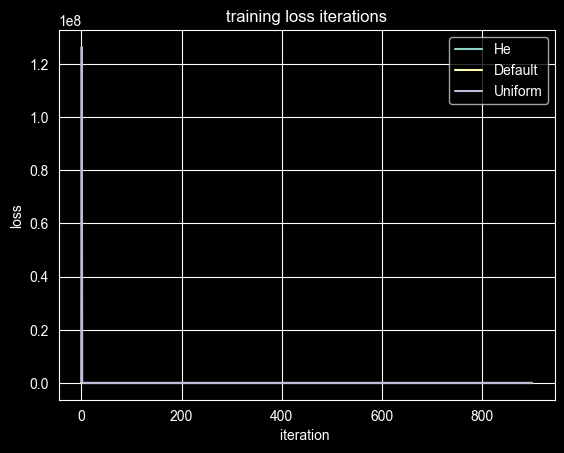

In [14]:
# Plot the loss

plt.plot(training_results_He['training_loss'], label='He')
plt.plot(training_results['training_loss'], label='Default')
plt.plot(training_results_Uniform['training_loss'], label='Uniform')
plt.ylabel('loss')
plt.xlabel('iteration ')
plt.title('training loss iterations')
plt.legend()

Compara la **pérdida de entrenamiento** para cada **modelo**.

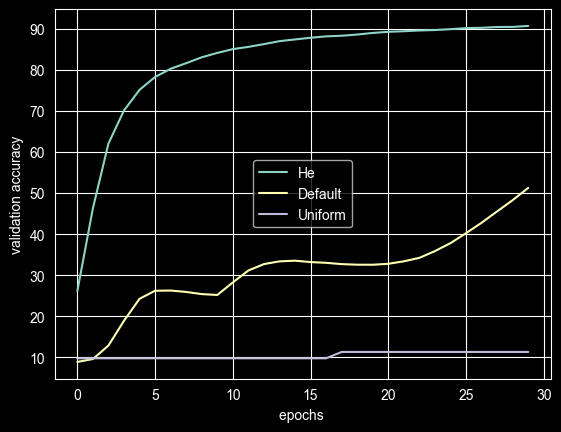

In [15]:
# Plot the accuracy

plt.plot(training_results_He['validation_accuracy'], label='He')
plt.plot(training_results['validation_accuracy'], label='Default')
plt.plot(training_results_Uniform['validation_accuracy'], label='Uniform')
plt.ylabel('validation accuracy')
plt.xlabel('epochs ')
plt.legend()
plt.show()